In [13]:
import ktrain
from ktrain import text as txt

import os
os.environ['DISABLE_V2_BEHAVIOR'] = '1'

In [14]:
TDATA = 'dataset/train.txt'
VDATA = 'dataset/test.txt'

In [15]:
# load data
(trn, val, preproc) = txt.entities_from_txt('dataset/train.txt', 'dataset/test.txt',                   
                                            use_char=True) # enable character embeddings

detected encoding: utf-8 (if wrong, set manually)
Number of sentences:  6719
Number of words in the dataset:  11441
Tags: ['I-DLEG', 'B-DLEI', 'I-DEC', 'B-LEI', 'O', 'I-LEI', 'B-DEC', 'I-LCOMP', 'B-DLEG', 'I-EC', 'B-LCOMP', 'B-MP', 'I-DLEI', 'I-LDEL', 'I-MP', 'B-LDEL', 'B-EC']
Number of Labels:  17
Longest sentence: 1557 words


In [16]:
# load model
model = txt.sequence_tagger('bilstm-crf', preproc)

/opt/conda/lib/python3.7/site-packages/ktrain/text/ner/models.py:108: UserWarning: Falling back to BiLSTM (no CRF) because DISABLE_V2_BEHAVIOR=False
  warnings.warn('Falling back to BiLSTM (no CRF) because DISABLE_V2_BEHAVIOR=False')
/opt/conda/lib/python3.7/site-packages/ktrain/text/ner/models.py:122: UserWarning: Setting use_char=False:  character embeddings cannot be used in TF2 due to open TensorFlow 2 bug (#33148).
Add os.environ["DISABLE_V2_BEHAVIOR"] = "1" to the top of script if you really want to use it.
  warnings.warn('Setting use_char=False:  character embeddings cannot be used in TF2 due to open TensorFlow 2 bug (#33148).\n' +\



IMPORTANT NOTE: ktrain uses the CRF module from keras_contrib, which is not yet
fully compatible with TensorFlow 2. You can still use the BiLSTM-CRF model
in ktrain for sequence tagging with TensorFlow 2, but you must add the
following to the top of your script or notebook BEFORE you import ktrain:

import os
os.environ['DISABLE_V2_BEHAVIOR'] = '1'

For this run, a vanilla BiLSTM model (with no CRF layer) will be used.

embedding schemes employed:
	word embeddings initialized randomly



In [17]:
# wrap model and data in ktrain.Learner object
learner = ktrain.get_learner(model, train_data=trn, val_data=val)

In [18]:

# conventional training for 1 epoch using a learning rate of 0.001 (Keras default for Adam optmizer)
learner.fit(0.01, 1, cycle_len=5, checkpoint_folder='/tmp/saved_weights')

preparing training data ...done.
preparing validation data ...done.
Epoch 1/5
210/210 [==============================] - 84s 400ms/step - loss: 0.0342 - val_loss: 0.0018
Epoch 2/5
210/210 [==============================] - 102s 484ms/step - loss: 0.0010 - val_loss: 9.7614e-04
Epoch 3/5
210/210 [==============================] - 107s 509ms/step - loss: 4.9171e-04 - val_loss: 9.1732e-04
Epoch 4/5
210/210 [==============================] - 108s 517ms/step - loss: 2.6435e-04 - val_loss: 7.7684e-04
Epoch 5/5
210/210 [==============================] - 94s 447ms/step - loss: 1.8801e-04 - val_loss: 7.7093e-04


In [19]:
learner.validate(class_names=preproc.get_classes())

   F1:  99.70
              precision    recall  f1-score   support

         DEC       1.00      1.00      1.00       776
        DLEG       1.00      1.00      1.00         8
        DLEI       0.99      1.00      1.00       102
          EC       1.00      1.00      1.00         7
       LCOMP       0.95      0.97      0.96        39
        LDEL       0.00      0.00      0.00         1
         LEI       1.00      1.00      1.00      1223
          MP       0.98      1.00      0.99        40

   micro avg       1.00      1.00      1.00      2196
   macro avg       0.86      0.87      0.87      2196
weighted avg       1.00      1.00      1.00      2196



0.9970447829052058

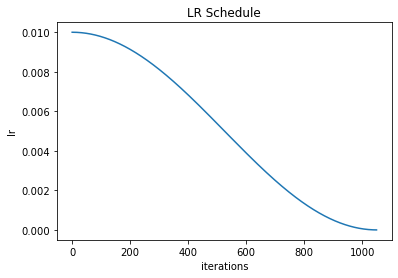

In [20]:
learner.plot('lr')